In [1]:
%matplotlib inline
import torch
import numpy as np
from torch import nn
from torch import optim
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
# torch.randn?
# optim.SGD?
# nn.MSELoss?

In [3]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(in_features=input_size, out_features=output_size)
    def forward(self, x):
        x = self.fc(x)
        return x

In [4]:
batch_size = 1000

In [5]:
input_size = 1

In [6]:
output_size = 1

In [7]:
X = torch.randn((batch_size, 1))

In [8]:
y = 2*X+1

In [9]:
X_var = Variable(X)

In [10]:
y_var = Variable(y)

In [11]:
X_var_np = X_var.data.numpy()

In [12]:
y_var_np = y_var.data.numpy()

In [13]:
net = LinearRegression(input_size=input_size, output_size=output_size)

In [14]:
criterion = nn.MSELoss()

In [15]:
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [16]:
for epoch in range(100):
    optimizer.zero_grad()
    
    y_pred_var = net(X_var)
    loss = criterion(y_pred_var, y_var)
    loss.backward()
    if epoch%1000==0:
        print('loss:', loss.data.numpy()[0])
    
    optimizer.step()

('loss:', 6.5672722)


In [17]:
y_pred_var = net(X_var)
y_pred_var_np = y_pred_var.data.numpy()

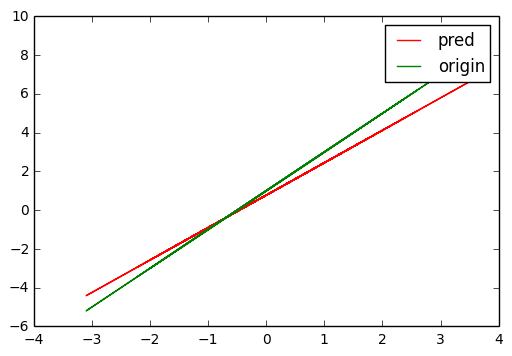

In [18]:
plt.plot(X_var_np, y_pred_var_np, 'r', label='pred')
plt.plot(X_var_np, y_var_np, 'g', label='origin')
plt.legend()